In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ROOT_DIR = '/content/gdrive/My Drive/trex_api'

In [1]:
pip install dds-cloudapi-sdk

In [61]:
# 1. Initialize the client with your API token.
from dds_cloudapi_sdk import Config
from dds_cloudapi_sdk import Client

token = "096ac96a78fea12d4e21a4372a89a944"
config = Config(token)
client = Client(config)

# 2. Upload local image to the server and get the URL.
#infer_image_url = "https://dev.deepdataspace.com/static/04_a.ae28c1d6.jpg"
infer_image_url = client.upload_file("/content/gdrive/My Drive/trex_api/107.jpg")  # you can also upload local file for processing
prompt_image_url = client.upload_file("/content/gdrive/My Drive/trex_api/107.jpg")  # you can use  the same image for prompt

# 3. Create a task with proper parameters.
from dds_cloudapi_sdk.tasks import IVPTask
from dds_cloudapi_sdk.tasks import RectPrompt
from dds_cloudapi_sdk.tasks import LabelTypes

task = IVPTask(
    prompt_image_url=prompt_image_url,
    prompts=[
        RectPrompt(rect=[0.218947, 0.114211, 0.016842, 0.045263], is_positive=True),
        RectPrompt(rect=[0.218421, 0.274211, 0.017895, 0.043158], is_positive=True),
        #RectPrompt(rect=[0.718947, 0.500526, 0.018947, 0.053684], is_positive=True),
        #RectPrompt(rect=[0.863158, 0.616842, 0.018947, 0.044211], is_positive=True),
        #RectPrompt(rect=[0.558947, 0.504737, 0.018947, 0.051579], is_positive=True),
        #RectPrompt(rect=[0.972632, 0.281579, 0.016842, 0.047368], is_positive=True)# Example of a second prompt
        # Add more prompts as needed
    ],
    infer_image_url=infer_image_url,
    infer_label_types=[LabelTypes.BBox, LabelTypes.Mask],  # infer both bbox and mask
)

# 4. Run the task and get the result.
client.run_task(task)

# 5. Parse the result.
from dds_cloudapi_sdk.tasks.ivp import TaskResult

result: TaskResult = task.result

mask_url = result.mask_url  # the image url with all masks drawn on
objects = result.objects  # the list of detected objects

for idx, obj in enumerate(objects):
    # get the detection score
    print(obj.score)  # 0.42

    # get the detection bbox
    print(obj.bbox)  # [635.0, 458.0, 704.0, 508.0]

    # get the detection mask, it's of RLE format
    #print(obj.mask.counts)  # ]o`f08fa14M3L2O2M2O1O1O1O1N2O1N2O1N2N3M2O3L3M3N2M2N3N1N2O...

    # convert the RLE format to RGBA image
    #mask_image = task.rle2rgba(obj.mask)
    #print(mask_image.size)  # (1600, 1170)

    # save the image to file
    #mask_image.save(f"/content/gdrive/My Drive/prediction_{idx}.png")



0.4
[0.0, 21.0, 10.0, 46.0]
0.36
[5.0, 0.0, 27.0, 12.0]
0.35
[1.0, 55.0, 12.0, 70.0]
0.34
[0.0, 10.0, 11.0, 46.0]
0.33
[91.0, 57.0, 97.0, 66.0]
0.32
[18.0, 23.0, 75.0, 41.0]
0.31
[103.0, 54.0, 125.0, 67.0]


In [ ]:
pip install supervision

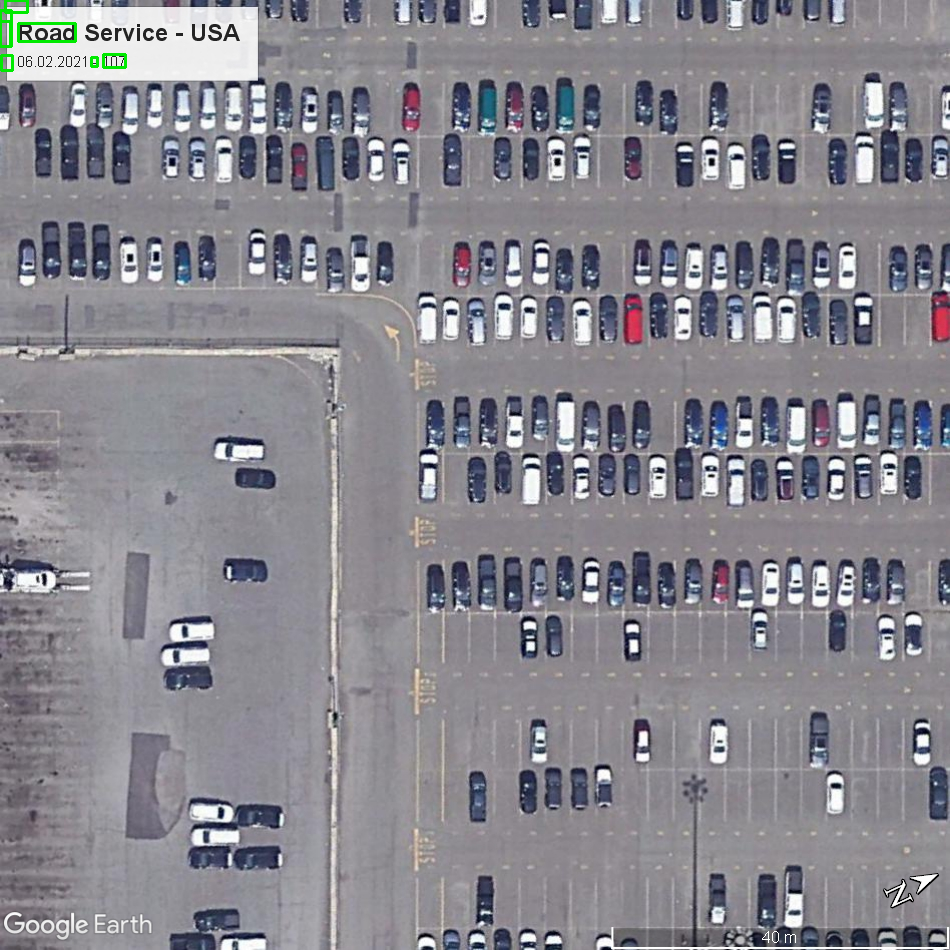

In [62]:
import cv2
import numpy as np
#from dds_cloudapi_sdk.tasks.ivp import TaskObject
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches

# Load the image
image = cv2.imread("/content/gdrive/My Drive/trex_api/107.jpg")

# Iterate through the detected objects
for idx, obj in enumerate(objects):
    # Extract the bounding box coordinates
    x_min, y_min, x_max, y_max = obj.bbox

    # Draw the bounding box on the image
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 234, 0), 2)

# Display the annotated image
cv2_imshow(image)